# Imports and Data

In [1]:
import pandas as pd
pd.set_option('expand_frame_repr', False)

In [9]:
ERA_SOURCE_DIRECTORY = r"C:\Users\CPL17\OneDrive\Documents\Code\Dev Projects\Current\PAC_New\Data"
STATE = "AL"
source_data = pd.read_excel(ERA_SOURCE_DIRECTORY + f"\ERA_{STATE}.xlsx",sheet_name="All Plants")

# Observe Characteristics of Relevant Columns 

These are the columns used for CNP filters

In [10]:
relevant_columns = ["Scientific Name","Sun Exposure","Soil Moisture","Pollinators","Flowering Months","Height (feet)","Showy","Flower Color"]

Note: Life Cycle is contained in the plant type column (Annual, perennial, biennial)

In [11]:
relevant_df = source_data[relevant_columns]
relevant_df

,Scientific Name,Sun Exposure,Soil Moisture,Pollinators,Flowering Months,Height (feet),Showy,Flower Color
0,Acacia farnesiana,NaN,Dry,Larval Host (Moth); Bats,NaN,NaN,NaN,NaN
1,Acalypha rhomboidea,NaN,"Moist, Dry",Larval Host (Moth),NaN,NaN,Yes,NaN
2,Acalypha virginica,"Sun, Part Shade","Moist, Dry",NaN,Jun–Jul,3,Yes,Red
3,Acer floridanum,"Sun, Part Shade, Shade","Wet, Moist",Wind,Apr–May,50,No,Yellow
4,Acer negundo,"Sun, Part Shade, Shade","Wet, Moist","Native Bees; Bombus; Honey Bees; Beetles, Wasp...",Mar–Apr,60,No,White
...,...,...,...,...,...,...,...,...
1623,Zephyranthes atamasca,"Sun, Part Shade","Wet, Moist",Moths,Mar–Apr,0.3–1,Yes,White
1624,Zizania aquatica,"Sun, Part Shade",Wet,Larval Host (Butterfly); Larval Host (Moth); Wind,Indeterminate,10,No,Green
1625,Zizaniopsis miliacea,"Sun, Part Shade",Wet,Larval Host (Butterfly); Larval Host (Moth); Wind,Jul–Sep,9,No,Yellow
1626,Zizia aptera,"Sun, Part Shade, Shade","Wet, Moist, Dry","Native Bees; Bombus; Honey Bees; Beetles, Wasp...",May–Jun,1–3,Yes,Yellow


In [12]:
relevant_df.set_index("Scientific Name",inplace=True)
relevant_df.to_csv(ERA_SOURCE_DIRECTORY +"/ERA_AL_Reduced.csv")

<AxesSubplot:>

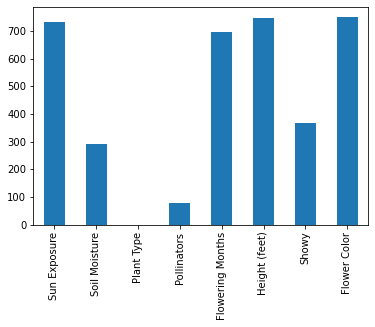

In [8]:
relevant_df.isna().sum().plot(kind="bar")

# Unique Values

In [16]:
relevant_df = pd.read_csv("Alabama_ERA_Reduced.csv",index_col=0)[relevant_columns]
relevant_df.drop("Scientific Name",axis=1,inplace=True)

In [17]:
full_df = None
for col in relevant_df:
    df = relevant_df[col].value_counts().reset_index()
    df.columns = [df.columns[1],"Count"]
    if full_df is not None:
        full_df = pd.concat([full_df,df],axis=1)
    else:
        full_df = df

full_df.to_csv("UniqueValues.csv")

# Down a level a granularity

In [18]:
def get_unique_values(df, column_name):
    unique_values = []
    for cell_value in df[column_name]:
        if isinstance(cell_value,float):
            continue
        if column_name == "Pollinators":
            values = str(cell_value).split(";")
        else:
            values = str(cell_value).split(",")
        for value in values:
            if value not in unique_values:
                unique_values.append(value)
    return unique_values

In [19]:
df = pd.read_csv("AL_UniqueValues.csv",index_col=0)

In [20]:
df.columns

Index(['Sun Exposure', 'Count', 'Soil Moisture', 'Count.1', 'Plant Type',
       'Count.2', 'Pollinators', 'Count.3', 'Flowering Months', 'Count.4',
       'Height (feet)', 'Count.5', 'Showy', 'Count.6', 'Flower Color',
       'Count.7'],
      dtype='object')

In [21]:
_ = {}
for col in df:
    if not col.startswith("Count"):
        _[col] = get_unique_values(df,col)

In [22]:
max_length = 0
for key in _:
    if len(_[key]) > max_length:
        max_length = len(_[key])
for key in _:
    number_of_pads = max_length - len(_[key])
    _[key] += [""]*number_of_pads

df - pd.DataFrame(_)
for col in df:
    df[col] = df[col].apply(lambda x: x.strip().title() if not isinstance(x,float) else x).drop_duplicates()

df.to_csv("AL_UniqueUniqueValues.csv",index=False)